##KNN

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970's as a non-parametric technique.

Algorithm

1.. Load the data

2.. Initialise the value of k

3.. For getting the predicted class, iterate from 1 to total number of training data points

    1.. Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our           distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.

    2.. Sort the calculated distances in ascending order based on distance values

    3.. Get top k rows from the sorted array

    4.. Get the most frequent class of these rows

    5.. Return the predicted class
    
Choosing the number of nearest neighbors i.e. determining the value of k plays a significant role in determining the efficacy of the model. Thus, selection of k will determine how well the data can be utilized to generalize the results of the kNN algorithm. A large k value has benefits which include reducing the variance due to the noisy data; the side effect being developing a bias due to which the learner tends to ignore the smaller patterns which may have useful insights.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import random
import time as tt
style.use('fivethirtyeight')

In [2]:
dataset={'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_features=[5,7]

<function matplotlib.pyplot.show(*args, **kw)>

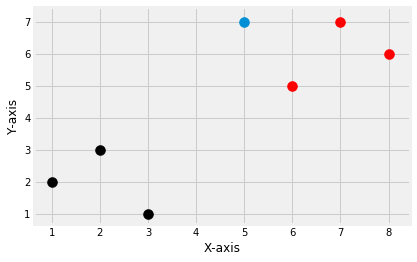

In [3]:
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

for group in dataset:
    for point in dataset[group]:
        plt.scatter(point[0],point[1],s=100,color=group)
plt.scatter(new_features[0],new_features[1],s=100)
plt.show

In [17]:
df=pd.read_csv('breastcancer.csv')
df.replace('?',-99999,inplace=True)
df.drop(['id'],1,inplace=True)
full_data=df.astype(float).values.tolist()

In [18]:
#random.shuffle(full_data)
test_size=0.2
train_set={2:[],4:[]}
test_set={2:[],4:[]}

train_data=full_data[:-int(test_size*len(full_data))]
test_data=full_data[-int(test_size*len(full_data)):]

In [19]:
for row in train_data:
    train_set[row[-1]].append(row[:-1])
for row in test_data:
    test_set[row[-1]].append(row[:-1])

In [20]:
#function to count number of unique elements
def class_counts(data):
    counts={}
    for row in data:
        label=row
        if label not in counts:
            counts[label]=0
        counts[label]+=1
    return counts

In [21]:
def k_nearest_neighbours(data,predict,k):
    dist=[]
    rev={}
    for group in data:
        for features in data[group]:
            distance=np.linalg.norm(np.array(features)-np.array(predict))
            dist.append([distance,group])
    votes=[i[1] for i in sorted(dist)[:k]]
    uniqueVotes=class_counts(votes)
    for vote in uniqueVotes:
        rev[uniqueVotes[vote]]=vote
    #data[rev[max(rev)]].append(predict)
    return rev[max(rev)]

In [22]:
print (k_nearest_neighbours(dataset,new_features,9))
print (dataset)

k
{'k': [[1, 2], [2, 3], [3, 1]], 'r': [[6, 5], [7, 7], [8, 6]]}


In [23]:
#print k_nearest_neighbours(dataset,[1,1],4)
#print dataset

In [24]:
#function to find the accuracy of the model at given value of k

def accuracy(k):
    correct=0
    total=0
    for group in test_set:
        for data in test_set[group]:
            vote=k_nearest_neighbours(dataset,new_features,k)
            #print vote , group
            if group==vote:
                correct+=1
                #print correct
            total+=1
    #print ('Accuracy:',correct/float(total))
    return correct/float(total)

In [25]:
start=tt.time()
print (accuracy(6))
print ('time',tt.time()-start)

0.0
time 0.01901078224182129


In [26]:
list=[]

In [27]:
for k in range(1,100):
    if k%2!=0:
        start=tt.time()
        list.append([k,accuracy(k)])
        print ('time: ',k,' : ',tt.time()-start)
print ('done')

time:  1  :  0.020001649856567383
time:  3  :  0.026516437530517578
time:  5  :  0.012032032012939453
time:  7  :  0.01199483871459961
time:  9  :  0.02000284194946289
time:  11  :  0.01200103759765625
time:  13  :  0.011997699737548828
time:  15  :  0.016013622283935547
time:  17  :  0.01105642318725586
time:  19  :  0.012027502059936523
time:  21  :  0.01205897331237793
time:  23  :  0.015654802322387695
time:  25  :  0.0
time:  27  :  0.015601158142089844
time:  29  :  0.015624284744262695
time:  31  :  0.029168367385864258
time:  33  :  0.012028932571411133
time:  35  :  0.01600050926208496
time:  37  :  0.01448202133178711
time:  39  :  0.0
time:  41  :  0.015629291534423828
time:  43  :  0.015626192092895508
time:  45  :  0.022149085998535156
time:  47  :  0.01591777801513672
time:  49  :  0.01202702522277832
time:  51  :  0.0040280818939208984
time:  53  :  0.015629291534423828
time:  55  :  0.015626192092895508
time:  57  :  0.01562643051147461
time:  59  :  0.02114653587341308